In [38]:
import pickle
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# ------------------------------------------------------------------
# Script para PCA en CIFAR-100: clases "class1" y "class2"
# ------------------------------------------------------------------

def unpickle(file_path):
    """Carga un archivo pickle de Python y devuelve el diccionario."""
    with open(file_path, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

# Ruta a la carpeta donde tienes la versión Python de CIFAR-100
cifar100_path = r"C:\Heri\GitHub\.Semester\Data-Mining\07-Reduccion-de-Dimensionalidad\02-Ejercicio\cifar-10-batches-py"

In [ ]:
# Carga de los datos de entrenamiento y metadatos
train_dict = unpickle(os.path.join(cifar100_path, 'data_batch_1'))
meta_dict  = unpickle(os.path.join(cifar100_path, 'batches.meta'))

In [40]:
meta_dict

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [43]:
class1 = 'bird'
class2 = 'automobile'
class3 = 'cat'

In [ ]:

# Decodificar nombres de clases
fine_label_names = [name.decode('utf-8') for name in meta_dict[b'label_names']]

# Obtener los índices de las clases class1 y class2
idx_class1 = fine_label_names.index(class1)
idx_class2 = fine_label_names.index(class2)
idx_class3 = fine_label_names.index(class3)

# Para todos


In [45]:
# Convertir datos y etiquetas a numpy
data = train_dict[b'data']               # (50000, 3072)
labels = np.array(train_dict[b'labels'])

In [46]:
# Filtrar solo las muestras de class1 y class2
mask = np.isin(labels, [idx_class1, idx_class2, idx_class3])
X = data[mask]
y = labels[mask]

In [47]:
# Pipeline: escalado + PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [48]:
# Ajustar PCA (sin supervisión) y transformar
X_pca = pipeline.fit_transform(X)
explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_

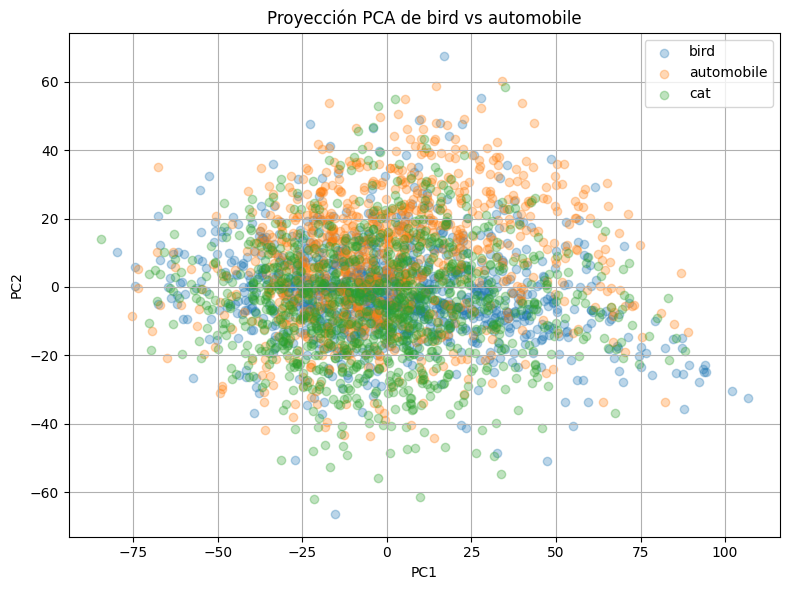

In [49]:
# --------------------------------------------------
# Gráfico 1: Proyección 2D con etiquetas coloreadas
# --------------------------------------------------
plt.figure(figsize=(8,6))
# class1
mask_1 = (y == idx_class1)
plt.scatter(X_pca[mask_1, 0], X_pca[mask_1, 1], marker='o', label=class1, alpha=0.3)
# class2
mask_2 = (y == idx_class2)
plt.scatter(X_pca[mask_2, 0], X_pca[mask_2, 1], marker='o', label=class2, alpha=0.3)
# class3
mask_3 = (y == idx_class3)
plt.scatter(X_pca[mask_3, 0], X_pca[mask_3, 1], marker='o', label=class3, alpha=0.3)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Proyección PCA de {class1} vs {class2}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

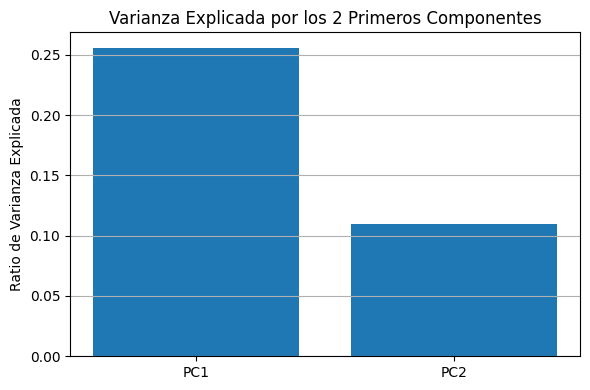

In [21]:

# --------------------------------------------------
# Gráfico 2: Varianza explicada por PC1 y PC2
# --------------------------------------------------
plt.figure(figsize=(6,4))
plt.bar([1, 2], explained_variance, tick_label=['PC1', 'PC2'])
plt.ylabel('Ratio de Varianza Explicada')
plt.title('Varianza Explicada por los 2 Primeros Componentes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()